## Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git
!pip install pygeos
!pip install rtree

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-4io7tgob
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-4io7tgob
     |████████████████████████████████| 15.3MB 320kB/s 
     |████████████████████████████████| 6.5MB 37.9MB/s 
  Created wheel for geopandas: filename=geopandas-0.9.0+21.g0ee710c-py2.py3-none-any.whl size=995263 sha256=6a5ae018cc5bf657b989a97c6d8f12798bfc37965e4d45a7f10906fbf30a828c
  Stored in directory: /tmp/pip-ephem-wheel-cache-o8rgtinl/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
     |████████████████████████████████| 2.1MB 3.9MB/s 
     |████████████████████████████████| 1.0MB 8.1MB/s 


In [2]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [3]:
gpd.read_file?

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [4]:
!wget https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

--2021-05-05 12:22:03--  https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip [following]
--2021-05-05 12:22:03--  https://data.biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23723270 (23M) [application/zip]
Saving to: ‘gadm36_PHL_shp.zip’

gadm36_PHL_shp.zip  100%[===================>]  22.62M  32.3MB/s    in 0.7s    

2021-05-05 12:22:04 (32.3 MB/s) - ‘gadm36_PHL_shp.zip’ saved [23723270/23723270]



In [5]:
!unzip /content/gadm36_PHL_shp.zip -d /content/gadm36_PHL_shp

Archive:  /content/gadm36_PHL_shp.zip
 extracting: /content/gadm36_PHL_shp/gadm36_PHL_0.cpg  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_0.dbf  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_0.prj  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_0.shp  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_0.shx  
 extracting: /content/gadm36_PHL_shp/gadm36_PHL_1.cpg  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_1.dbf  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_1.prj  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_1.shp  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_1.shx  
 extracting: /content/gadm36_PHL_shp/gadm36_PHL_2.cpg  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_2.dbf  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_2.prj  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_2.shp  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_2.shx  
 extracting: /content/gadm36_PHL_shp/gadm36_PHL_3.cpg  
  inflating: /content/gadm36_PHL_shp/gadm36_PHL_3.dbf  
  inflatin

In [6]:
# Read shapefile
ph = gpd.read_file('/content/gadm36_PHL_shp')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [ ]:
!wget https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [ ]:
# Read GeoJSON file
healthsites = gpd.read_file('/content/philippines.geojson', driver='GeoJSON')
healthsites.head()

# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


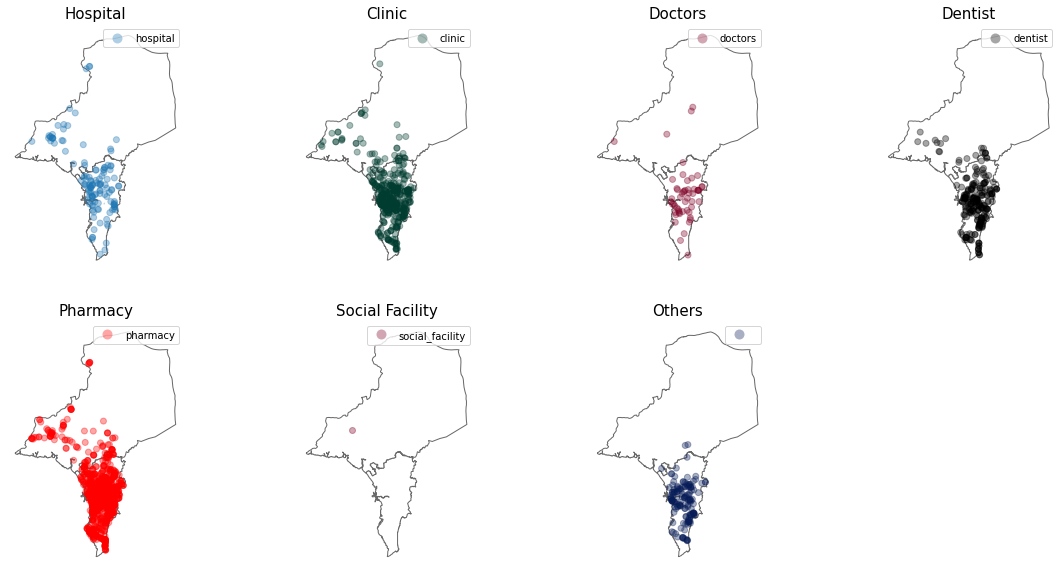

In [20]:
health_within_metro = gpd.sjoin(healthsites, ph[ph.NAME_1=="Metropolitan Manila"], op='within')
health_within_bulacan = gpd.sjoin(healthsites, ph[ph.NAME_1=="Bulacan"], op='within')


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 4, 1)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
ph[ph.NAME_1=="Bulacan"].plot(ax=ax, color='white', edgecolor='dimgray')
health_within_metro[health_within_metro.amenity=="hospital"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
health_within_bulacan[health_within_bulacan.amenity=="hospital"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Hospital', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 4, 2)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
ph[ph.NAME_1=="Bulacan"].plot(ax=ax, color='white', edgecolor='dimgray')
health_within_metro[health_within_metro.amenity=="clinic"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="BrBG_r")
health_within_bulacan[health_within_bulacan.amenity=="clinic"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="BrBG_r")
ax.set_title('Clinic', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 4, 3)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
ph[ph.NAME_1=="Bulacan"].plot(ax=ax, color='white', edgecolor='dimgray')
health_within_metro[health_within_metro.amenity=="doctors"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="YlOrRd_r")
health_within_bulacan[health_within_bulacan.amenity=="doctors"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="YlOrRd_r")
ax.set_title('Doctors', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 4, 4)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
ph[ph.NAME_1=="Bulacan"].plot(ax=ax, color='white', edgecolor='dimgray')
health_within_metro[health_within_metro.amenity=="dentist"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="copper")
health_within_bulacan[health_within_bulacan.amenity=="dentist"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="copper")
ax.set_title('Dentist', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 4, 5)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
ph[ph.NAME_1=="Bulacan"].plot(ax=ax, color='white', edgecolor='dimgray')
health_within_metro[health_within_metro.amenity=="pharmacy"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="autumn")
health_within_bulacan[health_within_bulacan.amenity=="pharmacy"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="autumn")
ax.set_title('Pharmacy', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 4, 6)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
ph[ph.NAME_1=="Bulacan"].plot(ax=ax, color='white', edgecolor='dimgray')
health_within_metro[health_within_metro.amenity=="social_facility"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="YlOrRd_r")
health_within_bulacan[health_within_bulacan.amenity=="social_facility"].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="YlOrRd_r")
ax.set_title('Social Facility', fontsize=15)
ax.axis('off');

ax = fig.add_subplot(2, 4, 7)
ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
ph[ph.NAME_1=="Bulacan"].plot(ax=ax, color='white', edgecolor='dimgray')
health_within_metro[health_within_metro.amenity==""].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="YlGnBu_r")
health_within_bulacan[health_within_bulacan.amenity==""].plot(ax=ax, column="amenity", alpha=0.35, legend=True, cmap="YlGnBu_r")
ax.set_title('Others', fontsize=15)
ax.axis('off');

#